<a href="https://colab.research.google.com/github/howard-haowen/NLP-demos/blob/main/texthero_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*   Author: [Haowen Jiang](https://howard-haowen.rohan.tw/)

In [ ]:
#@title
!pip install -U -q pip setuptools wheel
!pip install -U -q spacy
!python -m spacy download en_core_web_md

     |████████████████████████████████| 2.1 MB 5.0 MB/s 
     |████████████████████████████████| 1.2 MB 53.4 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.6/181.6 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 457.1/457.1 kB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 76.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 660.6/660.6 kB 45.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.6/58.6 kB 6.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us

In [ ]:
#@title
import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_md')

# Tokenize texts

In [ ]:
text = "I'd like to order three Cheeseburgers and one small fries."
doc = nlp(text)
for tok in doc:
    print(tok.text, tok.pos_, sep="|")

I|PRON
'd|AUX
like|VERB
to|PART
order|VERB
three|NUM
Cheeseburgers|NOUN
and|CCONJ
one|NUM
small|ADJ
fries|NOUN
.|PUNCT


# Parse dependency relationships

In [ ]:
Robot = "What would you like to order?"
Human = "I'm gonna get three Cheeseburgers and one small fries."
doc = nlp(Human)
displacy.render(doc, style='dep',jupyter=True)

In [ ]:
for token in doc:
    if token.dep_ == "dobj":
        children_of_dobj = [t.i for t in token.children]
        left_most_idx = min(children_of_dobj)
        right_most_idx = max(children_of_dobj)
        order = doc[left_most_idx:right_most_idx+1].text
        print(f"Robot: Your order is {order}. Is that correct?")

Robot: Your order is three Cheeseburgers and one small fries. Is that correct?


# Calculate text similarity

> Feel free to change `text_1` and `text_2` to other English texts. Then rerun the following cell.

In [ ]:
text_1 = "apple"
text_2 = "shoes"
doc_1 = nlp(text_1)
doc_2 = nlp(text_2)
sim_score = doc_1.similarity(doc_2)
sim_score

0.13327835810106206

- Cosine similarity

![](https://www.tyrrell4innovation.ca/wp-content/uploads/2021/06/rsz_jenny_du_miword.png)

In [ ]:
#@title
!pip install texthero -U -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 81.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 749.7/749.7 kB 53.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 54.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 21.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
en-core-web-md 3.3.0 requires spacy<3.4.0,>=3.3.0.dev0, but you have spacy 2.3.7 which is incompatible.


In [ ]:
#@title
import pandas as pd
import texthero as hero
pd.options.plotting.backend = "plotly"

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
/usr/local/lib/python3.7/dist-packages/spacy/util.py:845: UserWarning: [W094] Model 'en_core_web_sm' (2.2.5) specifies an under-constrained spaCy version requirement: >=2.2.2. This can lead to compatibility problems with older versions, or as new spaCy versions are released, because the model may say it's compatible when it's not. Consider changing the "spacy_version" in your meta.json to a version range, with a lower and upper pin. For example: >=3.3.0,<3.4.0
  for text in texts:


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


# Analyze multiple texts

In [ ]:
df = pd.read_csv(
   "https://github.com/jbesomi/texthero/raw/master/dataset/bbcsport.csv"
)
df

,text,topic
0,Claxton hunting first major medal\n\nBritish h...,athletics
1,O'Sullivan could run in Worlds\n\nSonia O'Sull...,athletics
2,Greene sets sights on world title\n\nMaurice G...,athletics
3,IAAF launches fight against drugs\n\nThe IAAF ...,athletics
4,"Dibaba breaks 5,000m world record\n\nEthiopia'...",athletics
...,...,...
732,Agassi into second round in Dubai\n\nFourth se...,tennis
733,Mauresmo fights back to win title\n\nWorld num...,tennis
734,Federer wins title in Rotterdam\n\nWorld numbe...,tennis
735,GB players warned over security\n\nBritain's D...,tennis


In [ ]:
df['topic'].value_counts().plot.bar()

> Feel free to change `TOPIC` to any of `football`, `rugby`, `criket`, `athletics`, `tennis`, and rerun the cell.

In [ ]:
TOPIC = 'tennis'
filt = df['topic'] == TOPIC
sample_text = df[filt].sample(1).iloc[0, 0]
sample_text

'Williams battles to Aussie title\n\nSerena Williams staged a remarkable recovery to beat Lindsay Davenport and win her second Australian Open title.\n\nThe 2003 champion claimed her seventh Grand Slam title, and her first since Wimbledon in 2003, 2-6 6-3 6-0. Williams had looked close to quitting with a rib injury when she left the court for treatment after five games. She quickly dropped the first set but from 3-3 in the second found another gear as Davenport\'s game collapsed, allowing Williams to take the title. Williams later explained her injury problem, saying it was the result of lunging for a ball early in the first set. "Lindsay had me on the run out wide on my backhand and my back went but eventually I was able to come back, thank goodness," she said. Davenport paid tribute to Williams, saying: "She\'s had a tough couple of years and she\'s come back like a champion."\n\nThe 23-year-old former world number one was in desperate trouble in the early stages as the injury hamper

# Clean texts

In [ ]:
df['clean_text'] = hero.clean(df['text'])
df

,text,topic,clean_text
0,Claxton hunting first major medal\n\nBritish h...,athletics,claxton hunting first major medal british hurd...
1,O'Sullivan could run in Worlds\n\nSonia O'Sull...,athletics,sullivan could run worlds sonia sullivan indic...
2,Greene sets sights on world title\n\nMaurice G...,athletics,greene sets sights world title maurice greene ...
3,IAAF launches fight against drugs\n\nThe IAAF ...,athletics,iaaf launches fight drugs iaaf athletics world...
4,"Dibaba breaks 5,000m world record\n\nEthiopia'...",athletics,dibaba breaks 000m world record ethiopia tirun...
...,...,...,...
732,Agassi into second round in Dubai\n\nFourth se...,tennis,agassi second round dubai fourth seed andre ag...
733,Mauresmo fights back to win title\n\nWorld num...,tennis,mauresmo fights back win title world number tw...
734,Federer wins title in Rotterdam\n\nWorld numbe...,tennis,federer wins title rotterdam world number one ...
735,GB players warned over security\n\nBritain's D...,tennis,gb players warned security britain davis cup p...


> Feel free to change `TOPIC` to any of `football`, `rugby`, `criket`, `athletics`, `tennis`, and rerun the cell.

In [ ]:
TOPIC = 'tennis'
filt = df['topic'] == TOPIC
sample = df[filt].sample(1)
raw_text = sample.iloc[0, 0]
clean_text = sample.iloc[0, 2]
print('Before cleaning >>>')
print(raw_text)
print('After cleaning >>>')
print(clean_text)

Before cleaning >>>
Venus stunned by Farina Elia

Venus Williams suffered a first-round defeat for the first time in four years at the Dubai Championships.

Sylvia Farina Elia, who had lost all nine of her previous meetings with the American fifth seed, won 7-5 7-6 (8-6). Former Wimbledon champion Conchita Martinez and India's Sania Mirza, the oldest and youngest players in the draw, also reached the second round. Martinez, 32, beat Shinobu Asagoe 6-4 6-4 and 18-year-old Mirza beat Jelena Kostanic 6-7 (7-2) 6-4 6-1. Mirza, the first Indian woman to win a WTA Tour title this month on home ground at Hyderabad, will now face US Open champion Svetlana Kuznetsova.

But she is remaining confident. "She (Kuznetsova) is a great player," she said. "But everyone is beatable and I am looking forward to a great match." Williams though blamed her defeat by Farina Elia on injuries. "Blisters were a factor, but mostly my stomach wasn't that great," she said. "I did it in the last tournament in the se

**Common preprocessing operations**

- Lowercase all texts
- Remove digits
- Remove punctuations
- Remove diacritics
- Remove whitespaces
- Remove stopwords


**Examples of stopwords**

![](https://www.computerhope.com/jargon/s/stop-words.png)

# Show top words per topic

> Feel free to change `NUM_TOP_WORDS` to other intergers.

In [ ]:
NUM_TOP_WORDS = 10
df.groupby('topic')['clean_text'].apply(lambda x: hero.top_words(x)[:NUM_TOP_WORDS])

topic               
athletics  said         181
           world        160
           year         159
           olympic      137
           race         112
           athens        99
           champion      99
           indoor        96
           european      94
           time          83
cricket    test         232
           england      225
           first        219
           cricket      216
           one          212
           said         203
           day          203
           series       169
           australia    144
           south        143
football   said         475
           chelsea      305
           game         297
           would        287
           club         274
           arsenal      247
           united       246
           players      240
           league       237
           time         220
rugby      england      395
           said         262
           wales        247
           ireland      229
           rugby        223

# Vectorize texts

![](https://miro.medium.com/max/1000/1*vWWmJlDykVRkjg9c38VbxQ.png)

- To convert a document into number, we'll need the Document-Term Matrix (DTM).
![](https://rlads2021.github.io/LabBook/assets/img/dtm.png)

In [ ]:
df['tfidf'] = hero.tfidf(df['clean_text'])
df

,text,topic,clean_text,tfidf
0,Claxton hunting first major medal\n\nBritish h...,athletics,claxton hunting first major medal british hurd...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,O'Sullivan could run in Worlds\n\nSonia O'Sull...,athletics,sullivan could run worlds sonia sullivan indic...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,Greene sets sights on world title\n\nMaurice G...,athletics,greene sets sights world title maurice greene ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0533678197008..."
3,IAAF launches fight against drugs\n\nThe IAAF ...,athletics,iaaf launches fight drugs iaaf athletics world...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,"Dibaba breaks 5,000m world record\n\nEthiopia'...",athletics,dibaba breaks 000m world record ethiopia tirun...,"[0.24734311047947527, 0.0, 0.0, 0.0, 0.0, 0.0,..."
...,...,...,...,...
732,Agassi into second round in Dubai\n\nFourth se...,tennis,agassi second round dubai fourth seed andre ag...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
733,Mauresmo fights back to win title\n\nWorld num...,tennis,mauresmo fights back win title world number tw...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
734,Federer wins title in Rotterdam\n\nWorld numbe...,tennis,federer wins title rotterdam world number one ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
735,GB players warned over security\n\nBritain's D...,tennis,gb players warned security britain davis cup p...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


# Train a clustering model

K-Means is one of the most popular "clustering" algorithms. K-means stores $k$ centroids that it uses to define clusters. A point is considered to be in a particular cluster if it is closer to that cluster's centroid than any other centroid.

K-Means finds the best centroids by alternating between 

1. assigning data points to clusters based on the current centroids 
2. chosing centroids (points which are the center of a cluster) based on the current assignment of data points to clusters.

till convergence..

![](https://i.imgur.com/42n9uvR.png)

In [ ]:
#@title
from sklearn.cluster import KMeans

In [ ]:
NUM_CLUSTERS = 5
doc_term_matrix = df['tfidf'].to_list()
km = KMeans(
    n_clusters=NUM_CLUSTERS, 
    max_iter=10000, 
    random_state=123,
    ).fit(doc_term_matrix)

In [ ]:
df['cluster'] = km.labels_
df

,text,topic,clean_text,tfidf,cluster
0,Claxton hunting first major medal\n\nBritish h...,athletics,claxton hunting first major medal british hurd...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
1,O'Sullivan could run in Worlds\n\nSonia O'Sull...,athletics,sullivan could run worlds sonia sullivan indic...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3
2,Greene sets sights on world title\n\nMaurice G...,athletics,greene sets sights world title maurice greene ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0533678197008...",0
3,IAAF launches fight against drugs\n\nThe IAAF ...,athletics,iaaf launches fight drugs iaaf athletics world...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
4,"Dibaba breaks 5,000m world record\n\nEthiopia'...",athletics,dibaba breaks 000m world record ethiopia tirun...,"[0.24734311047947527, 0.0, 0.0, 0.0, 0.0, 0.0,...",0
...,...,...,...,...,...
732,Agassi into second round in Dubai\n\nFourth se...,tennis,agassi second round dubai fourth seed andre ag...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4
733,Mauresmo fights back to win title\n\nWorld num...,tennis,mauresmo fights back win title world number tw...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4
734,Federer wins title in Rotterdam\n\nWorld numbe...,tennis,federer wins title rotterdam world number one ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4
735,GB players warned over security\n\nBritain's D...,tennis,gb players warned security britain davis cup p...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2


# Reduce dimensions

- **Principal Component Analysis** (PCA) is a common technique for reducing dimensions.

![](https://miro.medium.com/max/1400/1*mgncZaKaVx9U6OCQu_m8Bg.jpeg)

In [ ]:
df['pca'] = hero.pca(df['tfidf'])
df

,text,topic,clean_text,tfidf,cluster,pca
0,Claxton hunting first major medal\n\nBritish h...,athletics,claxton hunting first major medal british hurd...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[-0.0910590414916978, 0.10361334812167616]"
1,O'Sullivan could run in Worlds\n\nSonia O'Sull...,athletics,sullivan could run worlds sonia sullivan indic...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3,"[-0.0004418386868776305, 0.024876566732105202]"
2,Greene sets sights on world title\n\nMaurice G...,athletics,greene sets sights world title maurice greene ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0533678197008...",0,"[-0.11760849655072611, 0.1286715702439104]"
3,IAAF launches fight against drugs\n\nThe IAAF ...,athletics,iaaf launches fight drugs iaaf athletics world...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[-0.09134376142974426, 0.1538847221209715]"
4,"Dibaba breaks 5,000m world record\n\nEthiopia'...",athletics,dibaba breaks 000m world record ethiopia tirun...,"[0.24734311047947527, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,"[-0.09130228504792205, 0.13508542427959544]"
...,...,...,...,...,...,...
732,Agassi into second round in Dubai\n\nFourth se...,tennis,agassi second round dubai fourth seed andre ag...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4,"[-0.06662636875793171, 0.10876600123650011]"
733,Mauresmo fights back to win title\n\nWorld num...,tennis,mauresmo fights back win title world number tw...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4,"[-0.048128696860404406, 0.052883791211900115]"
734,Federer wins title in Rotterdam\n\nWorld numbe...,tennis,federer wins title rotterdam world number one ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4,"[-0.04967740993352044, 0.0599936889930225]"
735,GB players warned over security\n\nBritain's D...,tennis,gb players warned security britain davis cup p...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,"[-0.04875241253786057, 0.013807523748434915]"


# Visualize texts

In [ ]:
#@title
import plotly.express as px

In [ ]:
#@title
df['pca_0'] = df['pca'].apply(lambda x: x[0])
df['pca_1'] = df['pca'].apply(lambda x: x[1])

In [ ]:
fig = px.scatter(df, x="pca_0", y="pca_1", 
                 color="topic",
                 title="PCA BBC Sport news labelled by topics",
                 hover_name=df.index,)
fig.show()

In [ ]:
fig = px.scatter(df, x="pca_0", y="pca_1", 
                 color="cluster",
                 title="PCA BBC Sport news labelled by clusters",
                 hover_name=df.index,)
fig.show()

# Extract named entities

> Feel free to change `DOCID` to any number between 0 and 736.

In [ ]:
DOCID = 400
text = df.loc[DOCID, 'text']
doc = nlp(text)
displacy.render(doc, style='ent',jupyter=True)

**Types of named entities** 

- PERSON: People, including fictional.

- NORP: Nationalities or religious or political groups.

- FAC: Buildings, airports, highways, bridges, etc.

- ORG : Companies, agencies, institutions, etc.

- GPE: Countries, cities, states.

- LOC: Non-GPE locations, mountain ranges, bodies of water.

- PRODUCT: Objects, vehicles, foods, etc. (Not services.)

- EVENT: Named hurricanes, battles, wars, sports events, etc.

- WORK_OF_ART: Titles of books, songs, etc.

- LAW: Named documents made into laws.

- LANGUAGE: Any named language.

- DATE: Absolute or relative dates or periods.

- TIME: Times smaller than a day.

- PERCENT: Percentage, including ”%“.

- MONEY: Monetary values, including unit.

- QUANTITY: Measurements, as of weight or distance.

- ORDINAL: “first”, “second”, etc.

- CARDINAL: Numerals that do not fall under another type.

In [ ]:
df['named_entities'] = hero.named_entities(df['text'])

/usr/local/lib/python3.7/dist-packages/spacy/pipeline/lemmatizer.py:211: UserWarning:

[W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.



In [ ]:
df

,text,topic,clean_text,tfidf,cluster,pca,pca_0,pca_1,named_entities
0,Claxton hunting first major medal\n\nBritish h...,athletics,claxton hunting first major medal british hurd...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[-0.0910590414916978, 0.10361334812167616]",-0.091059,0.103613,"[(Claxton, ORG, 0, 7), (British, NORP, 35, 42)..."
1,O'Sullivan could run in Worlds\n\nSonia O'Sull...,athletics,sullivan could run worlds sonia sullivan indic...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3,"[-0.0004418386868776305, 0.024876566732105202]",-0.000442,0.024877,"[(O'Sullivan, PERSON, 0, 10), (Worlds, GPE, 24..."
2,Greene sets sights on world title\n\nMaurice G...,athletics,greene sets sights world title maurice greene ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0533678197008...",0,"[-0.11760849655072611, 0.1286715702439104]",-0.117608,0.128672,"[(Maurice Greene, PERSON, 35, 49), (Olympic 10..."
3,IAAF launches fight against drugs\n\nThe IAAF ...,athletics,iaaf launches fight drugs iaaf athletics world...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[-0.09134376142974426, 0.1538847221209715]",-0.091344,0.153885,"[(Two, CARDINAL, 182, 185), (IAAF, ORG, 505, 5..."
4,"Dibaba breaks 5,000m world record\n\nEthiopia'...",athletics,dibaba breaks 000m world record ethiopia tirun...,"[0.24734311047947527, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,"[-0.09130228504792205, 0.13508542427959544]",-0.091302,0.135085,"[(Dibaba, GPE, 0, 6), (5,000, CARDINAL, 14, 19..."
...,...,...,...,...,...,...,...,...,...
732,Agassi into second round in Dubai\n\nFourth se...,tennis,agassi second round dubai fourth seed andre ag...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4,"[-0.06662636875793171, 0.10876600123650011]",-0.066626,0.108766,"[(Agassi, GPE, 0, 6), (second, ORDINAL, 12, 18..."
733,Mauresmo fights back to win title\n\nWorld num...,tennis,mauresmo fights back win title world number tw...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4,"[-0.048128696860404406, 0.052883791211900115]",-0.048129,0.052884,"[(two, CARDINAL, 48, 51), (Amelie Mauresmo, PE..."
734,Federer wins title in Rotterdam\n\nWorld numbe...,tennis,federer wins title rotterdam world number one ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4,"[-0.04967740993352044, 0.0599936889930225]",-0.049677,0.059994,"[(Rotterdam\n\nWorld, FAC, 22, 38), (Roger Fed..."
735,GB players warned over security\n\nBritain's D...,tennis,gb players warned security britain davis cup p...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,"[-0.04875241253786057, 0.013807523748434915]",-0.048752,0.013808,"[(GB, GPE, 0, 2), (Britain, GPE, 33, 40), (Dav..."


In [ ]:
#@title
def filter_ent(named_entities, ent_label):
    results = [e[0] for e in named_entities if e[1]==ent_label]
    results = list(set(results))
    return results

In [ ]:
#@title
from collections import Counter

def show_top_entities(df, ent_label, top_k=10):
    corpus_ents = []
    for ents in df[ent_label]:
        corpus_ents.extend(ents)
    counter = Counter(corpus_ents)
    res = counter.most_common(top_k)
    return res

## Person

In [ ]:
df['person'] = df['named_entities'].apply(filter_ent, args=('PERSON',))
cols = ['text', 'topic', 'person']
df[cols]

,text,topic,person
0,Claxton hunting first major medal\n\nBritish h...,athletics,[Sarah Claxton]
1,O'Sullivan could run in Worlds\n\nSonia O'Sull...,athletics,"[Sonia O'Sullivan, Fionnualla Britton, O'Sulli..."
2,Greene sets sights on world title\n\nMaurice G...,athletics,"[Ato, Justin Gatlin, Maurice Greene, Francis O..."
3,IAAF launches fight against drugs\n\nThe IAAF ...,athletics,"[Frankie Fredericks, Lamine Diack]"
4,"Dibaba breaks 5,000m world record\n\nEthiopia'...",athletics,"[Jolanda Ceplak, Kluft, Berhane Adera, Bekele,..."
...,...,...,...
732,Agassi into second round in Dubai\n\nFourth se...,tennis,"[Roger Federer, Andre Agassi, Tim Henman, Hrba..."
733,Mauresmo fights back to win title\n\nWorld num...,tennis,"[Amelie Mauresmo, Venus Williams, Williams]"
734,Federer wins title in Rotterdam\n\nWorld numbe...,tennis,"[Roger Federer, Ljubicic, Ivan Ljubicic]"
735,GB players warned over security\n\nBritain's D...,tennis,"[Jeremy, Greg Rusedski, Murray, Alex Bogdanovi..."


> Feel free to change `TOP_K` to other numbers and rerun the cell.

In [ ]:
TOP_K = 10
show_top_entities(df, 'person', top_k=TOP_K)

[('Alex Ferguson', 29),
 ('Andy Robinson', 27),
 ('Williams', 26),
 ('Jose Mourinho', 26),
 ('Jones', 24),
 ('Michael Vaughan', 24),
 ('Robinson', 22),
 ('Johnson', 21),
 ('Arsene Wenger', 21),
 ('Roger Federer', 21)]

In [ ]:
df['person'].apply(len).plot()

In [ ]:
max_person_text = df.loc[692, 'text']
print(max_person_text)

Henman to face Saulnier test

British number one Tim Henman will face France's Cyril Saulnier in the first round of next week's Australian Open.

Greg Rusedski, the British number two, is in the same quarter of the draw and could face Andy Roddick in the second round if he beats Swede Jonas Bjorkman. Local favourite Lleyton Hewitt will meet France's Arnaud Clement, while defending champion and world number one Roger Federer faces Fabrice Santoro. Women's top seed Lindsay Davenport drew Spanish veteran Conchita Martinez.

Henman came from two sets down to defeat Saulnier in the first round of the French Open last year, so he knows he faces a tough test in Melbourne. The seventh seed, who has never gone beyond the quarter-finals in the year's first major and is lined up to meet Roddick in the last eight, is looking forward to the match. "He's tough player on any surface, he's got a lot of ability," he said. "We had a really tight one in Paris that went my way so I'm going to need to play

## Geopolitical entities

In [ ]:
df['gpe'] = df['named_entities'].apply(filter_ent, args=('GPE',))
cols = ['text', 'topic', 'gpe']
df[cols]

,text,topic,gpe
0,Claxton hunting first major medal\n\nBritish h...,athletics,"[Scotland, Colchester, Madrid, London]"
1,O'Sullivan could run in Worlds\n\nSonia O'Sull...,athletics,"[St Etienne, Ireland, France, London, Worlds, ..."
2,Greene sets sights on world title\n\nMaurice G...,athletics,"[Greece, France, Portugal, Helsinki, Finland, ..."
3,IAAF launches fight against drugs\n\nThe IAAF ...,athletics,"[Qatar, Monaco]"
4,"Dibaba breaks 5,000m world record\n\nEthiopia'...",athletics,"[Ireland, Dibaba, Slovenia, Tirunesh Dibaba, E..."
...,...,...,...
732,Agassi into second round in Dubai\n\nFourth se...,tennis,"[the United Arab Emirates, Dubai, Germany, Bel..."
733,Mauresmo fights back to win title\n\nWorld num...,tennis,"[Antwerp, Dinara Safina]"
734,Federer wins title in Rotterdam\n\nWorld numbe...,tennis,"[Doha, Rotterdam]"
735,GB players warned over security\n\nBritain's D...,tennis,"[Tel Aviv, GB, Britain, Israel]"


> Feel free to change `TOP_K` to other numbers and rerun the cell.

In [ ]:
TOP_K = 10
show_top_entities(df, 'gpe', top_k=TOP_K)

[('England', 217),
 ('France', 110),
 ('Australia', 101),
 ('Ireland', 86),
 ('Scotland', 83),
 ('South Africa', 71),
 ('Wales', 66),
 ('New Zealand', 64),
 ('Italy', 56),
 ('Newcastle', 54)]

In [ ]:
df['gpe'].apply(len).plot()

## Event

In [ ]:
df['event'] = df['named_entities'].apply(filter_ent, args=('EVENT',))
cols = ['text', 'topic', 'event']
df[cols]

,text,topic,event
0,Claxton hunting first major medal\n\nBritish h...,athletics,[]
1,O'Sullivan could run in Worlds\n\nSonia O'Sull...,athletics,[]
2,Greene sets sights on world title\n\nMaurice G...,athletics,"[World Championship, Olympic]"
3,IAAF launches fight against drugs\n\nThe IAAF ...,athletics,[]
4,"Dibaba breaks 5,000m world record\n\nEthiopia'...",athletics,[]
...,...,...,...
732,Agassi into second round in Dubai\n\nFourth se...,tennis,[]
733,Mauresmo fights back to win title\n\nWorld num...,tennis,"[the Paris Indoor Open, the Diamond Games]"
734,Federer wins title in Rotterdam\n\nWorld numbe...,tennis,[]
735,GB players warned over security\n\nBritain's D...,tennis,[]


In [ ]:
TOP_K = 10
show_top_entities(df, 'event', top_k=TOP_K)

[('World Cup', 40),
 ('Olympic', 35),
 ('Olympics', 28),
 ('the World Cup', 24),
 ('Wimbledon', 22),
 ('the Six Nations', 17),
 ('the Carling Cup', 11),
 ('Cup', 10),
 ('Carling Cup', 9),
 ('the Davis Cup', 8)]

In [ ]:
df['event'].apply(len).plot()

In [ ]:
filt = df['event'].apply(len) == 5
cols = ['text', 'topic', 'event']
df[filt][cols]

,text,topic,event
33,"Athens memories soar above lows\n\nWell, it's ...",athletics,"[Olympic, Games, the world junior championship..."
65,Britain boosted by Holmes double\n\nAthletics ...,athletics,"[Olympic, Olympics, the 2004 Olympics, the Wor..."
570,A year to remember for Irish\n\nThere used to ...,rugby,"[World Cup, the World Cup, the Six Nations Pla..."
579,Wilkinson to lead England\n\nFly-half Jonny Wi...,rugby,"[World Cup, the 2003 World Cup, Rugby World Cu..."
711,Federer joins all-time greats\n\nThe last year...,tennis,"[Olympic, Wimbledon, the Davis Cup, the Wimble..."


# Draw a word cloud

In [ ]:
#@title
def show_ent_wordcloud(ent_label):
    texts = df[ent_label].apply(lambda x: " ".join(x))
    hero.wordcloud(texts)

> Feel free to change `person` to `gpe` or `event`.

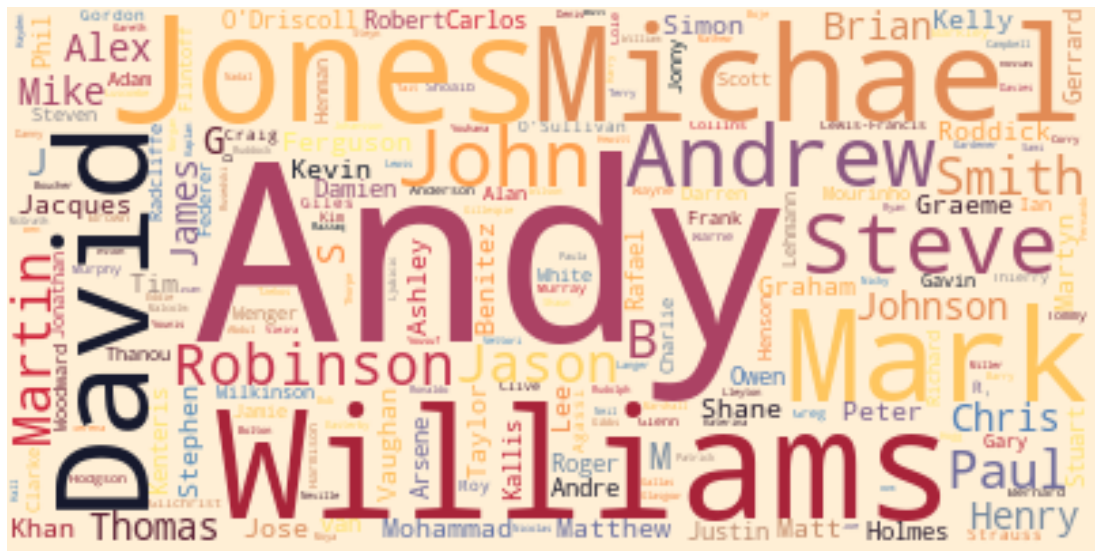

In [ ]:
entity_label = 'person'
show_ent_wordcloud(entity_label)